# Análisis de Emociones en las letras de Taylor Swift por Álbum

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
from math import pi
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('taylor_swift_lyrics.csv', encoding='ISO-8859-1')

Definimos emociones y palabras clave asociadas

In [4]:
emotions = {
    'Alegría': ['happy', 'joy', 'pleased'],
    'Tristeza': ['sad', 'unhappy', 'sorrow'],
    'Ira': ['angry', 'hate', 'rage'],
    'Sorpresa': ['surprised', 'shocked', 'astonished'],
    'Miedo': ['fear', 'scared', 'afraid'],
    'Confianza': ['trust', 'believe', 'faith']
}

Declaramos una función para contar palabras de emociones

In [5]:
def count_emotion_words(album_lyrics, emotion_words):
    lyrics_str = ' '.join(album_lyrics).lower()
    words = lyrics_str.split()
    word_count = Counter(words)
    emotion_count = sum(word_count[word] for word in emotion_words)
    return emotion_count

 Agrupamos los datos en un diccionario por álbum y contar palabras de emociones

In [6]:
album_emotions = {}
for album, group in df.groupby('album'):
    album_emotions[album] = {}
    for emotion, keywords in emotions.items():
        album_emotions[album][emotion] = count_emotion_words(group['lyric'], keywords)

 Convertimos a DataFrame y normalizamos la data

In [7]:
emotion_df = pd.DataFrame(album_emotions).T
emotion_df_normalized = emotion_df.div(emotion_df.sum(axis=1), axis=0)
# Guardamos el número de variables (emociones)
num_vars = len(emotion_df.columns)

Definimos colores personalizados para cada álbum en un diccionario.

In [8]:
album_colors = {
    'Taylor Swift': 'green',
    'Fearless': 'yellow',
    'Speak Now': 'purple',
    'Red': 'red',
    '1989': 'darkblue',
    'Reputation': 'black',
    'Lover': 'pink',
    'Folklore': 'gray',
    'Evermore': 'brown',
    'Midnights': 'blue'  # Azul eléctrico no está definido en matplotlib, así que usaremos 'blue'
}

Por último, procedemos con los detalles de la gráfica

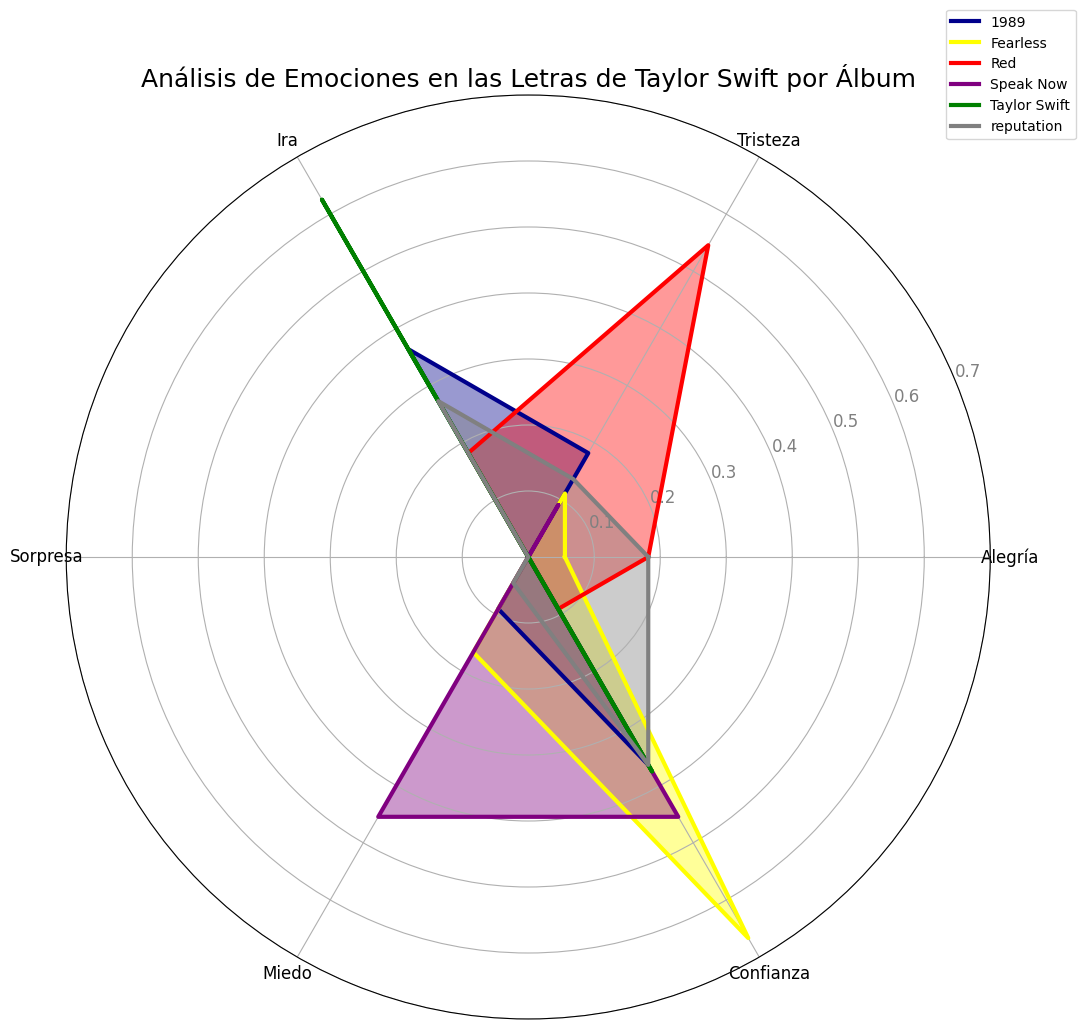

In [9]:
# Definimos ángulos de los ejes en el gráfico de radar
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Creación del gráfico de radar
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

# Realizamos una función para añadir datos al radar
def add_to_radar(album, data, color):
    values = data.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=3, linestyle='solid', label=album)
    ax.fill(angles, values, color=color, alpha=0.4)

# Añadimos cada álbum al gráfico de radar
for album, data in emotion_df_normalized.iterrows():
    color = album_colors.get(album, 'grey')
    add_to_radar(album, data, color)

# Mejoramos la estética
ax.set_facecolor('white')  # Fondo blanco
plt.xticks(angles[:-1], emotions.keys(), color='black', size=12)
plt.yticks(color='grey', size=12)
plt.title('Análisis de Emociones en las Letras de Taylor Swift por Álbum', size=18, color='black')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()
